<a href="https://colab.research.google.com/github/DeemOne-personal/Python-lessons/blob/main/%D0%94%D0%97_4_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_7_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание №3:**

Задача: Реализовать предсказание настроений с помощью классических алгоритмов + tf-idf на основе данных твиттов:
https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv

Использованые решения:
1. https://www.kaggle.com/umangtank/twitter-sentiment-analysis
2. https://www.kaggle.com/manascbehera123/nlp-using-tfidf-and-naive-bayes-simple-96-acc/comments
3. https://www.kaggle.com/sampsuman/tweet-sentiment-xgboost-navie-bayes
4. https://www.kaggle.com/devchauhan1/twitter-sentiment-analysis-multinomialnb-lstm
5. https://www.kaggle.com/ashutosh3060/nlp-basic-feature-creation-and-preprocessing/notebook
6. https://www.kaggle.com/prashant111/a-beginners-guide-to-dealing-with-text-data/comments
7. https://www.kaggle.com/muhammadshahzadkhan/nlp-twitter-sentiment-analysis-eda-naive-bayes

TBD:
https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import gc
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Выводим больше места под текст твитов
pd.set_option('display.max_colwidth',1300)
#pd.set_option('display.max_rows', 3000)

#Убираем ворнинги
import warnings
warnings.filterwarnings("ignore")

# Считываем данные
dftrn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edu3 - DS MFTI/Files/HW4 - train.csv')
#vdftst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edu3 - DS MFTI/Files/HW4 - test.csv')

Mounted at /content/drive


**1. Предварительный анализ данных**

Проверяем, что за данные нам пришли:

In [ ]:
dftrn.sample(10)

,id,label,tweet
14775,14776,0,@user many r asking the same question. and not very hopeful anything will change. ppl r not willing to compromise.
12387,12388,0,@user @user ðð½ðââ«ï¸. for the season! #justwinbaby
10494,10495,0,@user @user my last national show in oer-erkenschwick germany before my international in cappellen next month â¦
12340,12341,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
13992,13993,0,#clash royal #challenge hardly defense baseð­# play nowð²
15132,15133,0,happy father's day from first equity funding. fathersday #fathersday #firstequity #funding
1488,1489,0,@user can't wait to watch @user with everyone at @user this evening!
6205,6206,0,@user :( whaaat
9171,9172,0,"#stay happiness is not a state to arrive at, but a manner of traveling. âmargaret lee runbeck"
10860,10861,0,#david #alaba #bihday to my buddy #main #harnik! #da27


In [ ]:
dftst.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦


Смотрим структуру данных:

In [ ]:
print("Shape train: "+ str(dtrn.shape))
print("Shape test: "+ str(dtst.shape))
print("")
print("****TRAIN*****")
dftrn.info()
print("")
print("****TEST*****")
dftst.info()

Shape train: (31962, 3)
Shape test: (17197, 2)

****TRAIN*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB

****TEST*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


Смотрим структуру значений:


`Смотрим разбивку только Train, т.к. разброс значений индексов непринципиален`

In [ ]:
dftrn.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


Проверяем данные на наличие дыр:

`дыр нет`



In [ ]:
print(dftrn.isna().sum())
print('')
print(dftst.isna().sum())

id       0
label    0
tweet    0
dtype: int64

id       0
tweet    0
dtype: int64


Проверка на дубликаты:



```
Дубликатов нет
```



In [ ]:
#Дубликатов также нет
print(dftrn.duplicated().sum())
print(dftst.duplicated().sum())

0
0


**2. Извлечение фич**

Проанализируем фичи, которые мы можем извлечь из текста без анализа его смысла и аугментируем ими выборку:**

2.1. Посчитаем длину каждого твита

In [2]:
dftrn['length'] = dftrn['tweet'].apply(len)

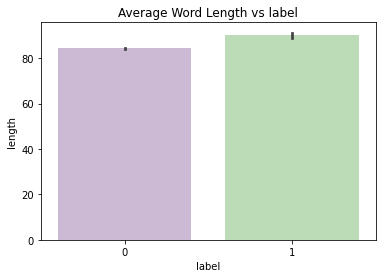

In [ ]:
sns.barplot('label','length',data = dftrn,palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

Посмотрим на распределение длины сообщений:



```
# Распределение длины сообщений между обычными и хейт-твитами также принципиально не отличаются
```



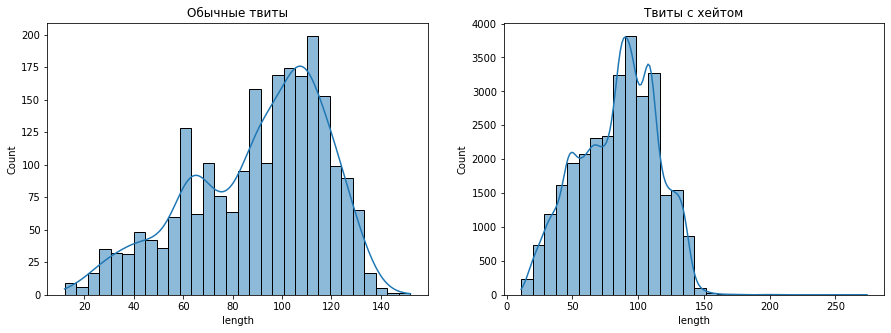

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(dftrn[dftrn["label"] == 1]["length"],bins = 30,ax = ax1, kde=True).set(title = "Обычные твиты")
sns.histplot(dftrn[dftrn["label"] == 0]["length"],bins = 30,ax = ax2, kde = True).set(title = "Твиты с хейтом")
plt.show()

2.2. Посчитаем количество слов и их среднюю длину

In [3]:
dftrn['word_count'] = dftrn['tweet'].apply(lambda x: len(str(x).split(" ")))
def avg_word_len (sentence):
    words = sentence.split()
    avg_len = sum(len(word) for word in words)/len(words)
    return avg_len
dftrn['avg_word_len'] = dftrn['tweet'].apply(lambda x: round(avg_word_len(x),1))

2.3. Посчитаем количество хэштегов и упоминаний других пользователей

In [4]:
dftrn['hashtags'] = dftrn['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dftrn['mentions'] = dftrn['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

2.4. Количество количество заглавных слов и знаков пунктуации в тексте, потенциально имеющих отношение к эмоциям

In [5]:
dftrn['upper_word'] = dftrn['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
dftrn['exclamation_mark'] =dftrn['tweet'].apply(lambda x: x.count('!'))
dftrn['comma_mark'] =dftrn['tweet'].apply(lambda x: x.count(','))

2.5 Количество чисел в тексте

In [6]:
dftrn['number_count'] = dftrn['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

Посмотрим на полученный датасет:

In [7]:
dftrn.head(4)

,id,label,tweet,length,word_count,avg_word_len,hashtags,mentions,upper_word,exclamation_mark,comma_mark,number_count
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,21,4.6,1,1,0,0,0,0
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,22,5.3,3,2,0,0,0,0
2,3,0,bihday your majesty,21,5,5.7,0,0,0,0,0,0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,17,4.9,1,0,0,3,0,0


**3. Проверяем сбалансированность целевого значения:**

```
Целевое значение сильно несбалансировано
```



0    29720
1     2242
Name: label, dtype: int64


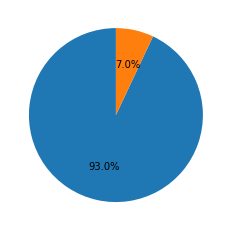

In [ ]:
print(dftrn['label'].value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(dftrn['label'].value_counts(), autopct='%1.1f%%', startangle=90 )
plt.show()

**4. Анализ семантики и чистка текста**

Посмотрим на самые популярные слова в позитивных и негативных твитах:

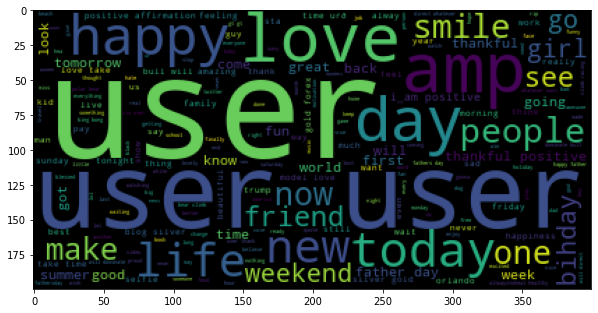

In [ ]:
alltweetstr=" ".join(dftrn['tweet'].tolist())
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(alltweetstr))
del allneutraltwtstr #чистим память

Позитивные:

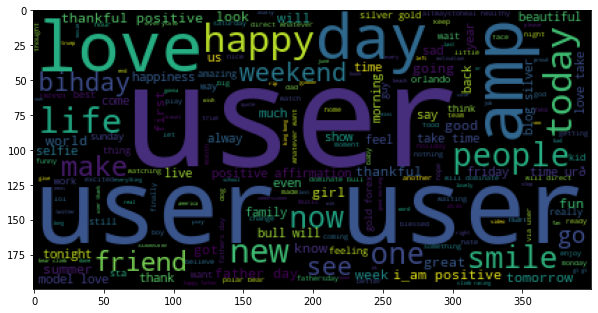

In [ ]:
allneutraltwtstr=" ".join(dftrn['tweet'][dftrn['label']==0].tolist())
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(allneutraltwtstr))
del allneutraltwtstr #чистим память

Негативные:

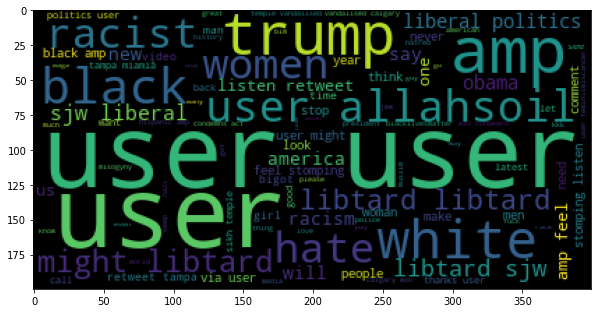

In [ ]:
allnegativetwtstr=" ".join(dftrn['tweet'][dftrn['label']==1].tolist())
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(allnegativetwtstr))
del allnegativetwtstr #чистим память

Очевидный вывод из этого графика:

Много слов-паразитов типа user (в контексте данной подборки - обращений пользователей друг к другу). Но есть и много слов-индикаторов, за которые можно зацепиться типа "hate/racist/libtart"(hate speech) vs "happy/love/smile/" (positive/neutral speech).

Подборка явно напрашивается на то, чтобы ее почистили, чем мы и займемся ниже

In [8]:
#Natural language toolkit
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

def textclean(text):
  #убирем лишние символы и числа, которые не несут прямой пользы для обучения
  #в теории из них потом можно сделать доп.фичи
  result = re.sub('[^a-zA-Z]',repl=' ', string=text)
  
  #приводим к lowercase, чтобы избежать дублирования словаря
  result = result.lower()
    
  #убираем междометия и пр бесполезные слова типа the, a, an, in
  #дополнительно убираем бессмысленные слова типа user, на к-е приходится большой вес
  #пару последних добавил сам на основнии анализа облака слов
  stoplist=stopwords.words('english')
  stoplist.append('user')
  stoplist.append('today')
  stoplist.append('new')
  result = [word for word in result.split() if word not in stoplist]
  
  #проводим стемминг
  #приведение слова к первоначальной форме
  stemmer = PorterStemmer()
  
  #склеиваем назад
  result = [stemmer.stem(word) for word in result]
  result =  ' '.join(result)

  return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Проверим, как функция работает на микроподборке:

In [ ]:
#Проверка работы
data = [[10, 'aSFgd,!Fgdfg asss i me user'], [10, 'asfgd,!fgdfg'], [10, 'asfgd,!fgdfg']]
dftst = pd.DataFrame(data, columns = ['id', 'txt'])
dftst['txt']=dftst['txt'].apply(textclean)
dftst

,id,txt
0,10,asfgd fgdfg asss
1,10,asfgd fgdfg
2,10,asfgd fgdfg


Применяем процедуры чистки к нашей подборке:

In [9]:
x=dftrn['tweet'].apply(textclean)
y=dftrn['label']

После чистки результат налицо:

Я не стал, как многие авторы работ на kaggle, удалять самые часто встречающиеся слова (за исключением предлогов и несмысловых), т.к. вместе с ними могли бы пропасть и важные для нас индикаторы типа love, hate, которые уже явно говорят о сентименте данного твита.


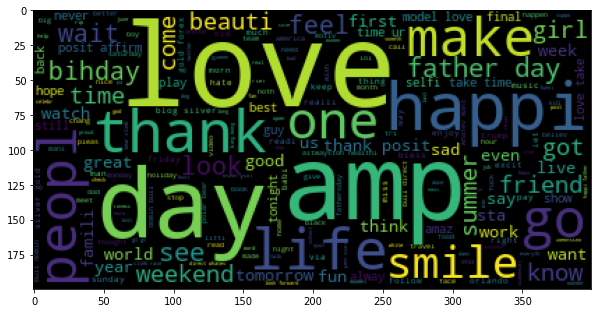

In [ ]:
words=" ".join(x.tolist())
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(words))
del words #чистим память

**5. Векторизация текста и фич**

Проводим TF-IDF векторизацию.

Данная опция является дефолтной для дальнейшей отправки текста в модель.
TF-IDF векторизация дает больше информации за счет подсчета значимости слов и штрафования слов-паразитов в отличие от CountVectorizer, который считает встречаемость слов, преобразуя текст в разреженную матрицу из булевых значений.
В случае ограничений по ресурсам будем использовать HashingVectorizer, который не создает словаря соответствий (не сможем декодить назад), но тем самым бережет ресурсы.

После векторизации, данные можно подавать в модель.



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
x_tfidf = tfidf.fit_transform(x).toarray()
y_ifidf = y.values

Проверяем результат:

In [ ]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
type(x_tfidf)

numpy.ndarray

Пример, как работает векторизация текста (для решения задачи значения не имеет):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cat_in_the_hat_docs=['abc bcd edf ess apc abc abc', 'abc bde abc', 'abd abc dgs']

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(cat_in_the_hat_docs)
count_vector=cv.fit_transform(cat_in_the_hat_docs)
print('***VOCABULARY***')
print(cv.vocabulary_)
print('***VECTOR***')
print(count_vector)
print('***SHAPE***')
print(count_vector.shape)
print('***SHAPE***')
print(count_vector.toarray())

Теперь предстоит конкатинировать полученную матрицу с фичами, полученными для аугментации. Данные фич просятся на нормализацию(шкалирование), т.к. в противном случае длина сообщения станет ключевой фичей за счет больших абсолютных значений.

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 

#Получаем dataframe с нашими фичами
x_features = dftrn[['length', 'word_count', 'hashtags', 'mentions', 'number_count', 'upper_word', 'avg_word_len', 'comma_mark', 'exclamation_mark', 'upper_word']]

#Шкалируем 
min_max_scaler = preprocessing.MinMaxScaler()
x_features_scaled = min_max_scaler.fit_transform(x_features)
del x_features
gc.collect()

#Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
x_features_poly = poly.fit_transform(x_features_scaled)
del x_features_scaled
gc.collect()

#Конкатинируем две матрицы
x_tfidf_features=pd.concat([pd.DataFrame(x_tfidf), pd.DataFrame(x_features_poly)], axis=1).values
del x_tfidf
del x_features_poly
gc.collect()

0

После всех наших преобразований операты хватает впритык, что не даст нам посчитать модель. В ходе расчетов удаляем ненужные объекты и призываем Garbage Collector.

**7. Моделирование**

Делим данные на train и test:

In [12]:
from sklearn.model_selection import train_test_split
def split_train_test(x,y):
  x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.20)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_train_test(x_tfidf_features, y_ifidf)

Точечный запуск конкретной модели:

```
Использую для отладки
```

 

In [13]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import classification_report

def model_run(model, x_train, y_train):
    model.fit(x_train, y_train)
    score = model.score(x_train,y_train)
    print("Accuracy: {}".format(score))

    # classification report
    y_preds = model.predict(x_train)
    print("Classification report:")
    print(classification_report(y_train, y_preds))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model_run(model, x_train, y_train)

Accuracy: 0.946654151511596
Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     23772
           1       0.99      0.24      0.39      1797

    accuracy                           0.95     25569
   macro avg       0.97      0.62      0.68     25569
weighted avg       0.95      0.95      0.93     25569



Как ни странно, без аугментации получалось даже немного лучше. Для меня это неочевидный результат, т.к. я нормализовывал фичи и сдабривал полиномиальными признаками

In [ ]:
#Accuracy: 0.9539285853963785
#Classification report:
              #precision    recall  f1-score   support

           #0       0.95      1.00      0.98     23776
           #1       0.98      0.35      0.52      1793

    #accuracy                           0.95     25569
   #macro avg       0.97      0.67      0.75     25569
#weighted avg       0.96      0.95      0.94     25569

Полноценный перебор моделей

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
clf_C = DecisionTreeClassifier()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

clf_A = LogisticRegression()
clf_B = AdaBoostClassifier()
clf_C = DecisionTreeClassifier()
clf_D = SVC()
clf_E = RandomForestClassifier()
clf_F = MultinomialNB()
clfs = [clf_A,clf_B,clf_C,clf_D,clf_E,clf_F]

df_score = pd.DataFrame(index=None, columns=['model','recall_score','precision_score','f1_score','accuracy-score'])
for clf in clfs:
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    score1 = recall_score(y_test,pred)
    score2 = precision_score(y_test,pred)
    score3 = f1_score(y_test,pred)
    acuracy_score = accuracy_score(y_test,pred)
  
    df_score = df_score.append(pd.Series({
                "model" : clf.__class__.__name__,
                "recall_score" : score1,
                "precision_score" : score2,
                "f1_score" : score3,
                "accuracy-score" : acuracy_score}),ignore_index = True)

df_score

,model,recall_score,precision_score,f1_score,accuracy-score
0,LogisticRegression,0.336887,0.923977,0.493750,0.949320
1,AdaBoostClassifier,0.347548,0.761682,0.477306,0.944158
2,DecisionTreeClassifier,0.573561,0.612756,0.592511,0.942124
3,SVC,0.417910,0.946860,0.579882,0.955576
4,RandomForestClassifier,0.396588,0.948980,0.559398,0.954169
5,MultinomialNB,0.191898,1.000000,0.322004,0.940716


Лучшей моделью являются решающие деревья, которые имеют не самую высокую accuracy, но самый большой precision_score/f1_score. В задаче с несбалансированным целевым значением эти метрики имеют решающее значение.

In [ ]:
                 #model 	recall_score	precision_score	f1_score	accuracy-score
#DecisionTreeClassifier 	 0.573561	     0.612756	      0.592511	0.94212

Лучший результат нам дает DecisionTreeClassifier. У него один из самых высоких accuracy, и при этом - самый высокий f1_score, что критически важно для imbalanced данных.

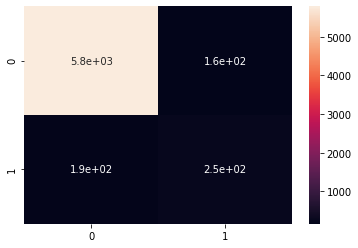

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot= True)


Данная модель удостоится нашего дальнейшего внимания для тюнинга гиперпараметров:

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1,2,5,10,15,50],
    'max_features': ['auto','sqrt','log2'],
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_leaf_nodes': [1,2,5,10],
}

from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(clf_C, parameters, scoring=scorer, cv=5,verbose = 1,n_jobs = -1)
# Fit the data
grid_fit = grid_obj.fit(x_train, y_train)
best_clf = grid_fit.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Мне не хватило операты вывести итоговый результат:

In [ ]:
best_clf.get_params()

Источники:

https://kavita-ganesan.com/how-to-use-countvectorizer/#.YOXQKCMmxPY

https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#.YOXbUSMmxPZ

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

https://planspace.org/20150607-textblob_sentiment/

https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

https://www.kaggle.com/nicapotato/abc-s-of-tf-idf-boosting-0-798

https://stackoverflow.com/questions/51848161/how-to-add-numpy-matrix-as-new-columns-for-pandas-dataframe

https://gist.github.com/danemacaulay/c8e3194b63570de1cf88f431ade32107

https://stackoverflow.com/questions/44226139/how-to-combine-tfidf-features-with-selfmade-features

https://www.kaggle.com/questions-and-answers/55544

https://stackoverflow.com/questions/61827301/combine-additional-data-to-my-tfidf-array

https://stackoverflow.com/questions/51906274/cannot-understand-with-sklearns-polynomialfeatures

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://stackoverflow.com/questions/39698363/concatenate-join-a-numpy-array-with-a-pandas-dataframe

https://gist.github.com/danemacaulay/c8e3194b63570de1cf88f431ade32107

https://stackoverflow.com/questions/44226139/how-to-combine-tfidf-features-with-selfmade-features

https://stackoverflow.com/questions/40570282/combine-sklearn-tfidf-with-additional-data

https://www.kaggle.com/questions-and-answers/55544

https://www.kaggle.com/lopuhin/eli5-for-mercari

https://www.kaggle.com/nicapotato/abc-s-of-tf-idf-boosting-0-798

https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html

https://datascience.stackexchange.com/questions/22813/using-tf-idf-with-other-features-in-scikit-learn

https://www.kaggle.com/nicapotato/abc-s-of-tf-idf-boosting-0-798

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee